## Shapley 值的计算

### 注意事项

0. **这是本实验应该看的第一个文件，请根据本文件的指示，逐步完成实验**
1. 本实验需要填空的文件夹为 exactSV.py 和 mcSV.py，**请不要修改其他文件，包括本 ipynb 文件**
2. 完成两个文件函数代码的实现后，在以下每个代码框中验证计算结果
3. 在实验过程中，**允许使用生成式人工智能理解代码框架并完成实验**
4. **提交时需要将整个代码文件夹压缩成 .zip 格式提交，并且注意保留本 ipynb 文件的所有运行结果**，不要清除输出
5. （**很重要**）建议每次更新代码后，在运行 ipynb 文件前先重启（restart），否则其中一些记忆变量会干扰实验结果

文件内容解释：

- dataset: iris 训练与测试数据
- groundTruth: 不同任务 Shapley 值计算的正确答案
- exactSV.py：代补充 Shapley 值准确算法（基于联盟）的代码文件；
- game.py: 定义了几个 Shapley 值计算任务，具体内容无需理解，可以视为黑箱；
- homework.ipynb: 运行测试的文件；
- mcSV: 待补充采样算法近似计算 Shapley 值算法的代码文件；
- naiveSV: 已给出的 Shapley 值准确算法（基于排列）的代码问题；
- util.py: 定义了一些函数，具体内容无需理解，可以视为黑箱。

### 任务一：理解 naiveSV.py 中的 Shapley 值计算代码

naiveSV.py 中给出了使用公式
$$ SV_i = \frac{1}{n!} \sum_{\sigma \in S_n} (u(P_i(\sigma) \cup \{i\}) - u(P_i(\sigma))) $$
准确计算 Shapley 值的算法。要求同学们根据给出的注释理解代码，在接下来的填空中可以仿照这一代码完成实验。

### 任务二：补全 exactSV.py 中的 Shapley 值计算代码，并运行接下来的两个代码框验证结果

exactSV.py 中希望你补全基于公式
$$ SV_i = \frac{1}{n!} \sum_{S \subseteq N \setminus \{i\}} |S|!(n - |S| - 1)! (u(S \cup \{i\}) - u(S)) $$
准确计算 Shapley 值的算法。要求同学们根据注释补充完成相应的代码，然后运行接下来的两个代码框验证结果准确性。

In [1]:
import os
import numpy as np
from exactSV import exact_sv
from game import Game

game_type = 'airport'
num_players = 10
game = Game(gt = game_type, n = num_players)
mySV = exact_sv(game) # 你计算的 Shapley 值
print("My Results:", mySV)
gt_path = f"./groundTruth/{game_type}_{num_players}.txt"

# 判断你的答案是否正确（即与标准答案相差有限）
if os.path.exists(gt_path):
    try:
        gt_values = np.loadtxt(gt_path) # Shapley 值标准答案
        print("Ground Truth:", gt_values)
        error = np.abs(mySV - gt_values)
        threshold = 1e-2
        is_correct = np.abs(error) < threshold
        accuracy = np.mean(is_correct) * 100
        print(f"Accuracy: {accuracy:.2f}%")
    except Exception as e:
        print(f"Accuracy caculation wrong: {e}")
else:
    print(f"Ground truth not exists: {gt_path}")

Number of player:  10
Generated 1023 Sets


100%|██████████| 1023/1023 [00:00<00:00, 42179.29it/s]

My Results: [0.1        0.21111111 0.33611111 0.47896825 0.64563492 0.84563492
 1.09563492 1.42896825 1.92896825 2.92896825]
Ground Truth: [0.1        0.21111111 0.33611111 0.47896825 0.64563492 0.84563492
 1.09563492 1.42896825 1.92896825 2.92896825]
Accuracy: 100.00%


检查扩展性：当 $n = 20$ 时运算可能偏慢，该部分检查你的算法是否能在合理的时间内计算完成。

In [2]:
import os
import numpy as np
from exactSV import exact_sv
from game import Game

game_type = 'airport'
num_players = 20
game = Game(gt = game_type, n = num_players)
mySV = exact_sv(game)
print("My Results:", mySV)
gt_path = f"./groundTruth/{game_type}_{num_players}.txt"
if os.path.exists(gt_path):
    try:
        gt_values = np.loadtxt(gt_path)
        print("Ground Truth:", gt_values)
        error = np.abs(mySV - gt_values)
        threshold = 1e-2
        is_correct = np.abs(error) < threshold
        accuracy = np.mean(is_correct) * 100
        print(f"Accuracy: {accuracy:.2f}%")
    except Exception as e:
        print(f"Accuracy caculation wrong: {e}")
else:
    print(f"Ground truth not exists: {gt_path}")

Number of player:  20
Generated 1048575 Sets


100%|██████████| 1048575/1048575 [00:44<00:00, 23303.02it/s]


My Results: [0.05       0.10263158 0.15818713 0.21701066 0.27951066 0.34617733
 0.4176059  0.49452898 0.57786231 0.6687714  0.7687714  0.87988251
 1.00488251 1.14773966 1.31440632 1.51440632 1.76440632 2.09773966
 2.59773966 3.59773966]
Ground Truth: [0.05       0.10263158 0.15818713 0.21701066 0.27951066 0.34617733
 0.4176059  0.49452898 0.57786231 0.6687714  0.7687714  0.87988251
 1.00488251 1.14773966 1.31440632 1.51440632 1.76440632 2.09773966
 2.59773966 3.59773966]
Accuracy: 100.00%


### 任务三：补全 mcSV.py 中的 Shapley 值采样算法，并运行下面的代码框验证结果

使用蒙特卡洛方法计算给定博弈中每个玩家的 Shapley 值。蒙特卡洛方法通过随机采样玩家排列来估算 Shapley 值，适用于玩家数量较多时的近似计算。

实现非常简单：回忆基于排列的准确 Shapley 值计算算法，需要计算 n! 个排列中所有玩家的边际贡献，蒙特卡洛采样算法从 n! 个排列中随机出一部分计算所有玩家的边际贡献作为 Shapley 值的近似解。

实现完成后运行下面的代码检查采样方法实现准确性，注意**可以调整采样次数，但不要修改误差标准**。

In [3]:
import os
import numpy as np
from mcSV import mc_sv
from game import Game

threshold = 1e-2
game_type = 'airport'
num_players = 25
total_sample_budgets = 1600000 * num_players
game = Game(gt = game_type, n = num_players)
mySV = mc_sv(game, total_sample_budget = total_sample_budgets)
print("My Results:", mySV)
gt_path = f"./groundTruth/{game_type}_{num_players}.txt"
if os.path.exists(gt_path):
    try:
        gt_values = np.loadtxt(gt_path)
        print("Ground Truth:", gt_values)
        error = np.abs(mySV - gt_values)
        is_correct = np.abs(error) < threshold
        accuracy = np.mean(is_correct) * 100
        print(f"Accuracy: {accuracy:.2f}%")
    except Exception as e:
        print(f"Accuracy caculation wrong: {e}")
else:
    print(f"Ground truth not exists: {gt_path}")

100%|██████████| 1600000/1600000 [02:18<00:00, 11525.31it/s]


My Results: [0.04020625 0.08174875 0.12470687 0.17052375 0.217485   0.26884375
 0.32043437 0.37792188 0.43837125 0.49768375 0.56512187 0.63422937
 0.71359625 0.79881313 0.88913125 0.98452375 1.09729813 1.22442812
 1.36705375 1.52434125 1.734815   1.98793187 2.31781    2.81424375
 3.80873688]
Ground Truth: [0.04       0.08166667 0.12514493 0.17059947 0.21821852 0.26821852
 0.3208501  0.37640566 0.43522918 0.49772918 0.56439585 0.63582442
 0.7127475  0.79608083 0.88698992 0.98698992 1.09810103 1.22310103
 1.36595818 1.53262484 1.73262484 1.98262484 2.31595818 2.81595818
 3.81595818]
Accuracy: 100.00%


检查其他任务的采样准确性：
1. voting：51人投票计算每个人的权利大小；
2. iris 机器学习分类模型，注意使用已经给定的 util 中 get dataset 的方式划分数据集合（通俗而言就是不要动代码），否则会导致 Shapley 值答案变化。

In [4]:
## voting
import os
import numpy as np
from mcSV import mc_sv
from game import Game

threshold = 1e-2
game_type = 'voting'
num_players = 51
total_sample_budgets = 800000 *num_players
game = Game(gt = game_type, n = num_players)
mySV = mc_sv(game, total_sample_budget = total_sample_budgets)
print("My Results:", mySV)
gt_path = f"./groundTruth/{game_type}_{num_players}.txt"
if os.path.exists(gt_path):
    try:
        gt_values = np.loadtxt(gt_path)
        print("Ground Truth:", gt_values)
        error = np.abs(mySV - gt_values)
        is_correct = np.abs(error) < threshold
        accuracy = np.mean(is_correct) * 100
        print(f"Accuracy: {accuracy:.2f}%")
    except Exception as e:
        print(f"Accuracy caculation wrong: {e}")
else:
    print(f"Ground truth not exists: {gt_path}")

100%|██████████| 800000/800000 [02:53<00:00, 4616.54it/s] 

My Results: [0.08833    0.07941375 0.05058    0.04878625 0.04885125 0.0473075
 0.03921    0.0314575  0.031625   0.0257525  0.0240375  0.02390875
 0.0219175  0.02226125 0.02203875 0.01975125 0.0182625  0.01819875
 0.01832875 0.0184975  0.01647875 0.01649125 0.01636125 0.01636875
 0.0145875  0.01459375 0.01269375 0.01306    0.01284125 0.0127075
 0.010835   0.01076    0.01089125 0.01073375 0.00902    0.00735875
 0.00720375 0.00711625 0.0073475  0.0071075  0.0073875  0.0071675
 0.0072025  0.00724875 0.0054     0.00555    0.005275   0.00543875
 0.005385   0.00542875 0.0054425 ]
Ground Truth: [0.08831  0.07973  0.05096  0.04898  0.04898  0.047    0.03917  0.03147
 0.03147  0.02577  0.02388  0.02388  0.022    0.022    0.022    0.02013
 0.01827  0.01827  0.01827  0.01827  0.01641  0.01641  0.01641  0.01641
 0.01456  0.01456  0.01272  0.01272  0.01272  0.01272  0.01088  0.01088
 0.01088  0.01088  0.009053 0.00723  0.00723  0.00723  0.00723  0.00723
 0.00723  0.00723  0.00723  0.00723  0.005412 

In [2]:
## iris classfication
import os
import numpy as np
from sklearn import svm
from mcSV import mc_sv
from game import Game
from util import get_dataset

threshold = 1e-2
game_type = 'iris'
num_players = 100
total_sample_budgets = 10000 * num_players
datapath = './dataset'
trnX, trnY, tstX, tstY = get_dataset(game_type, datapath, trainsize = 150 - num_players)
mymodel = svm.SVC(decision_function_shape='ovo', probability=True)
game = Game(gt = game_type, x_train = trnX, y_train = trnY, x_test = tstX, y_test = tstY,
            model = mymodel, n = num_players)
mySV = mc_sv(game, total_sample_budget = total_sample_budgets)
print("My Results:", mySV)
gt_path = f"./groundTruth/{game_type}_{num_players}.txt"
if os.path.exists(gt_path):
    try:
        gt_values = np.loadtxt(gt_path)
        print("Ground Truth:", gt_values)
        error = np.abs(mySV - gt_values)
        is_correct = np.abs(error) < threshold
        accuracy = np.mean(is_correct) * 100
        print(f"Accuracy: {accuracy:.2f}%")
    except Exception as e:
        print(f"Accuracy caculation wrong: {e}")
else:
    print(f"Ground truth not exists: {gt_path}")

100%|██████████| 10000/10000 [15:49<00:00, 10.54it/s]

My Results: [ 0.008144  0.009468  0.005686  0.013276  0.009052  0.01001   0.014034
  0.013984  0.01301   0.004702  0.008382  0.013724  0.014652  0.014288
  0.007176  0.01449   0.007318  0.009232  0.014996  0.005974  0.010788
  0.013154  0.006406  0.009754  0.008768  0.00603   0.0132    0.008732
  0.01287   0.004484  0.010228  0.01404   0.013542  0.007478 -0.000284
  0.013254  0.013     0.013024  0.01433   0.002802  0.004002  0.012552
 -0.001256  0.010108  0.01006   0.009544  0.015092  0.014548  0.008602
  0.011922  0.01448   0.01407   0.014176  0.001868  0.014276  0.014172
  0.013598  0.01233   0.014894  0.00357   0.004202  0.008226  0.002306
  0.011896  0.014492  0.011542  0.00678   0.0103    0.008208  0.00742
  0.004036  0.014782  0.00344   0.005222  0.014318  0.009154  0.011364
  0.013242  0.01509   0.004272  0.012822  0.011054  0.013722  0.013316
  0.013416  0.002034  0.011414  0.011596  0.007856  0.0113    0.005296
  0.005836  0.007424  0.00971   0.01301   0.009424  0.005994  0.01

测试采样算法的收敛情况，即随着采样次数的增大，采样得到的 Shapley 近似值与真实值之间的均方误差降低的情况。下面的代码通过绘制均方误差随采样次数变化的曲线应当能展示这一点。

Ground Truth: [0.08831  0.07973  0.05096  0.04898  0.04898  0.047    0.03917  0.03147
 0.03147  0.02577  0.02388  0.02388  0.022    0.022    0.022    0.02013
 0.01827  0.01827  0.01827  0.01827  0.01641  0.01641  0.01641  0.01641
 0.01456  0.01456  0.01272  0.01272  0.01272  0.01272  0.01088  0.01088
 0.01088  0.01088  0.009053 0.00723  0.00723  0.00723  0.00723  0.00723
 0.00723  0.00723  0.00723  0.00723  0.005412 0.005412 0.005412 0.005412
 0.005412 0.005412 0.005412]
Testing with sample budgets: [     101      427     1792     7515    31506   132085   553741  2321442
  9732155 40800000]

Calculating Shapley Values for budget = 101...


100%|██████████| 1/1 [00:00<00:00, 2214.52it/s]


Budget: 101, MSE: 1.907276e-02

Calculating Shapley Values for budget = 427...


100%|██████████| 8/8 [00:00<00:00, 4282.63it/s]


Budget: 427, MSE: 2.133888e-03

Calculating Shapley Values for budget = 1792...


100%|██████████| 35/35 [00:00<00:00, 4119.33it/s]


Budget: 1792, MSE: 5.839769e-04

Calculating Shapley Values for budget = 7515...


100%|██████████| 147/147 [00:00<00:00, 3913.39it/s]


Budget: 7515, MSE: 2.333969e-04

Calculating Shapley Values for budget = 31506...


100%|██████████| 617/617 [00:00<00:00, 4216.09it/s]


Budget: 31506, MSE: 2.487625e-05

Calculating Shapley Values for budget = 132085...


100%|██████████| 2589/2589 [00:00<00:00, 4408.28it/s]


Budget: 132085, MSE: 8.450943e-06

Calculating Shapley Values for budget = 553741...


100%|██████████| 10857/10857 [00:02<00:00, 4445.90it/s]


Budget: 553741, MSE: 1.363510e-06

Calculating Shapley Values for budget = 2321442...


100%|██████████| 45518/45518 [00:10<00:00, 4464.64it/s]


Budget: 2321442, MSE: 3.328359e-07

Calculating Shapley Values for budget = 9732155...


100%|██████████| 190826/190826 [00:40<00:00, 4673.56it/s]


Budget: 9732155, MSE: 1.151645e-07

Calculating Shapley Values for budget = 40800000...


100%|██████████| 800000/800000 [02:48<00:00, 4759.82it/s] 


Budget: 40800000, MSE: 2.627433e-08


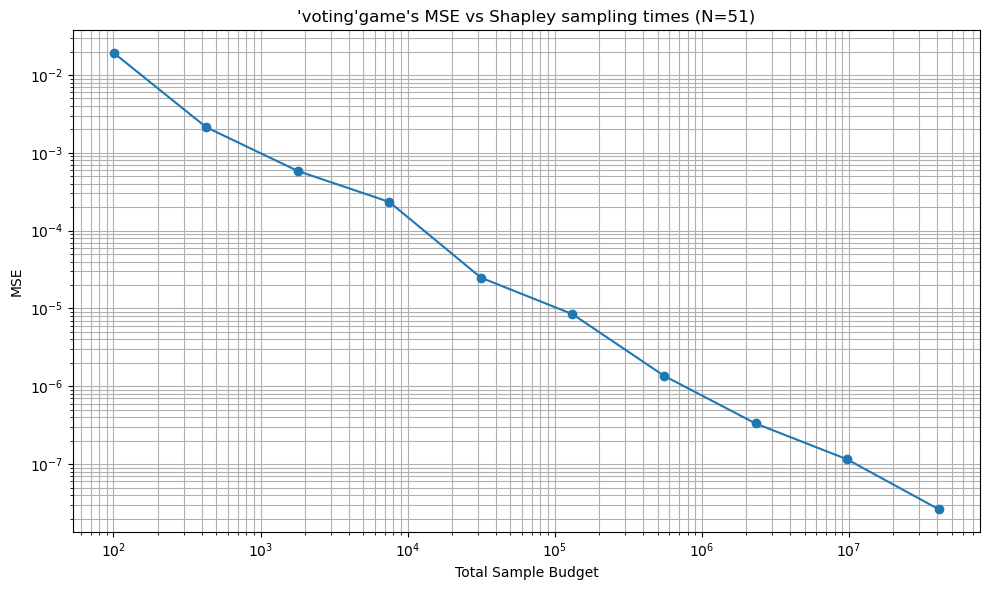

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mcSV import mc_sv
from game import Game

threshold = 1e-2
game_type = 'voting'
num_players = 51
min_total_sample_budgets = num_players * 2
max_total_sample_budgets = num_players * 800000
game = Game(gt = game_type, n = num_players)
gt_path = f"./groundTruth/{game_type}_{num_players}.txt"
if os.path.exists(gt_path):
    try:
        gt_values = np.loadtxt(gt_path)
        print("Ground Truth:", gt_values)
    except Exception as e:
        print(f"Error loading ground truth: {e}")
        gt_values = None
else:
    print(f"Ground truth not exists: {gt_path}")

if gt_values is None:
    print("Cannot proceed with MSE calculation without ground truth. Exiting.")
    exit()
else:
    #######examples#################
    sample_budgets_to_test = np.logspace(np.log10(min_total_sample_budgets), 
                                         np.log10(max_total_sample_budgets), num=10, dtype=int)
    sample_budgets_to_test = np.maximum(num_players, sample_budgets_to_test)
    sample_budgets_to_test = np.unique(sample_budgets_to_test)
    print(f"Testing with sample budgets: {sample_budgets_to_test}")
    ################################

    mse_values = []

    for budget in sample_budgets_to_test:
        print(f"\nCalculating Shapley Values for budget = {budget}...")
        current_mySV = mc_sv(game, total_sample_budget=budget)
        
        if current_mySV is None or len(current_mySV) != len(gt_values):
            print(f"Error: mc_sv did not return valid Shapley values for budget {budget}. Expected length {len(gt_values)}, got {len(current_mySV) if current_mySV is not None else 'None'}.")
            mse_values.append(np.nan)
            continue

        mse = np.mean((current_mySV - gt_values)**2)
        mse_values.append(mse)
        print(f"Budget: {budget}, MSE: {mse:.6e}")

    plt.figure(figsize=(10, 6))
    plt.plot(sample_budgets_to_test, mse_values, marker='o', linestyle='-')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Total Sample Budget")
    plt.ylabel("MSE")
    plt.title(f"'{game_type}'game's MSE vs Shapley sampling times (N={num_players})")
    plt.grid(True, which="both", ls="-")
    plt.tight_layout()
    plt.show()